In [2]:
!gdown https://drive.google.com/uc?id=1g_n7kzDppAA2BNwUfit0eVKXLHRVBOw- -O inputs/src.png -q
!gdown https://drive.google.com/uc?id=1ywAx_GKGswFQjt3rWBLjdLtzjrjiOWpG -O inputs/bgr.png -q

In [3]:
!gdown https://drive.google.com/uc?id=1-t9SO--H4WmP7wUl1tVNNeDkq47hjbv4 -O weights/torchscript_resnet50_fp32.pth -q

In [16]:
import torch
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image

device="cpu"

In [17]:
model = torch.jit.load('weights/torchscript_resnet50_fp32.pth').to(device).eval()

In [63]:
src = Image.open('inputs/src.png')
bgr = Image.open('inputs/bgr.png')

In [64]:
src = to_tensor(src).to(device).unsqueeze(0)
bgr = to_tensor(bgr).to(device).unsqueeze(0)

In [65]:
if src.size(2) <= 2048 and src.size(3) <= 2048:
  model.backbone_scale = 1/4
  model.refine_sample_pixels = 80_000
else:
  model.backbone_scale = 1/8
  model.refine_sample_pixels = 320_000

In [66]:
pha, fgr = model(src, bgr)[:2]

In [67]:
com = pha * fgr + (1 - pha)# * torch.tensor([255/255, 120/255, 155/255], device=device).view(1, 3, 1, 1)

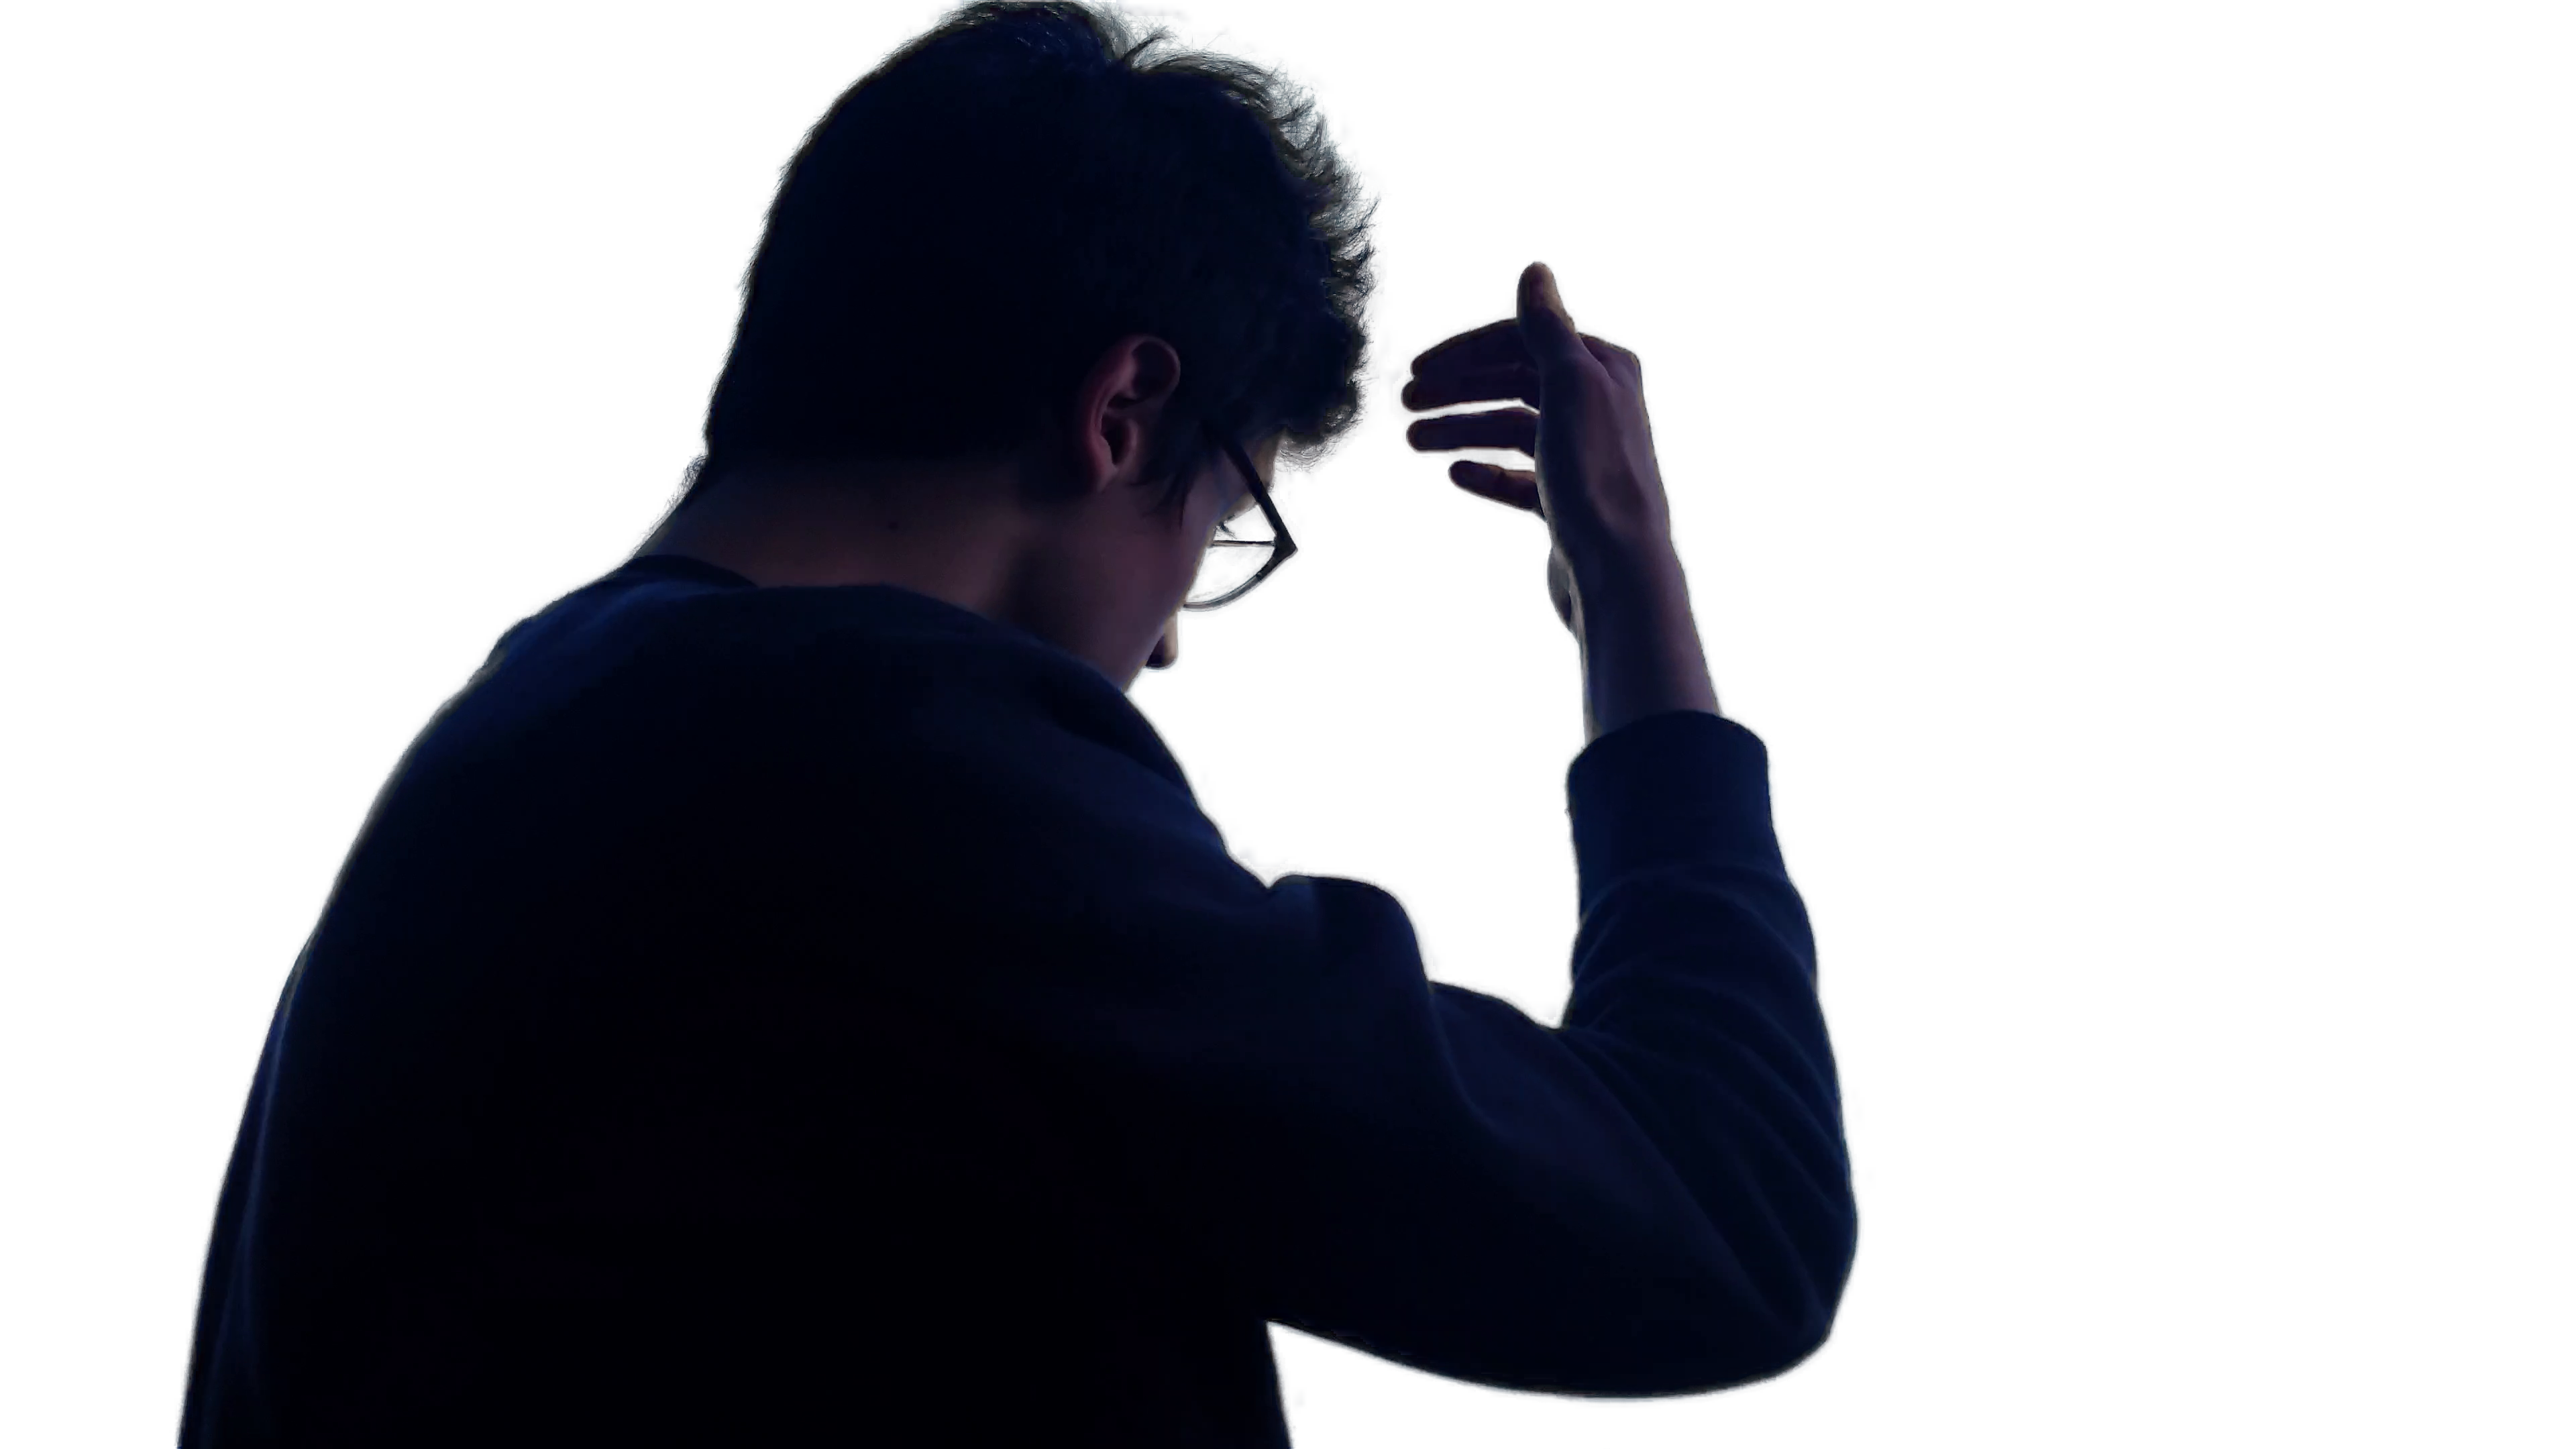

In [68]:
to_pil_image(com[0].cpu())